In [4]:
import igraph
import cairo
import graphviz
from io import open
from conllu import parse
from conllu import parse_incr
from conllu.models import TokenList, Token
from conllu import parse_tree
from conllu import parse_tree_incr
import matplotlib.pyplot as plt
import cairocffi


initial_data = """# sent_id = 2013Algoritm.xml_4
# text = Таким образом, некоторые инструкции должны выполняться строго после завершения работы инструкций, от которых они зависят.
1	Таким	такой	DET	_	Case=Ins|Gender=Masc|Number=Sing|PronType=Dem	2	det	2:det	_
2	образом	образ	NOUN	_	Animacy=Inan|Case=Ins|Gender=Masc|Number=Sing	6	parataxis	6:parataxis	SpaceAfter=No
3	,	,	PUNCT	_	_	2	punct	2:punct	_
4	некоторые	некоторый	DET	_	Case=Nom|Number=Plur|PronType=Ind	5	det	5:det	_
5	инструкции	инструкция	NOUN	_	Animacy=Inan|Case=Nom|Gender=Fem|Number=Plur	6	nsubj	6:nsubj|7:nsubj	_
6	должны	должен	ADJ	_	Degree=Pos|Number=Plur|Variant=Short	0	root	0:root	_
7	выполняться	выполнять	VERB	_	Aspect=Imp|VerbForm=Inf|Voice=Pass	6	xcomp	6:xcomp	_
8	строго	строго	ADV	_	Degree=Pos	10	obl	10:obl	_
9	после	после	ADP	_	_	10	case	10:case	_
10	завершения	завершение	NOUN	_	Animacy=Inan|Case=Gen|Gender=Neut|Number=Sing	7	obl	7:obl:после:gen	_
11	работы	работа	NOUN	_	Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing	10	nmod	10:nmod:gen	_
12	инструкций	инструкция	NOUN	_	Animacy=Inan|Case=Gen|Gender=Fem|Number=Plur	11	nmod	11:nmod:gen|17:obl:от:gen	SpaceAfter=No
13	,	,	PUNCT	_	_	17	punct	17:punct	_
14	от	от	ADP	_	_	15	case	15:case	_
15	которых	который	PRON	_	Case=Gen|PronType=Int,Rel	17	obl	12:ref	_
16	они	они	PRON	_	Case=Nom|Number=Plur|Person=3|PronType=Prs	17	nsubj	17:nsubj	_
17	зависят	зависеть	VERB	_	Aspect=Imp|Mood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act	12	acl:relcl	12:acl:relcl	SpaceAfter=No
18	.	.	PUNCT	_	_	6	punct	6:punct	_
"""



In [5]:
sentences = parse(initial_data)
print("***TokenList***")
print("Type:", type(sentences))
print(sentences, end = '\n\n')


sentence = sentences[0]
print("***The sentence for processing***")
print("Type:", type(sentence))
for token in sentence:
    print(token, end = ' ')
print('\n')


metadata = sentence.metadata
print("***Metada***")
print(metadata)
text = metadata['text']
print("Text:\n", text, sep = '')



***TokenList***
Type: <class 'list'>
[TokenList<Таким, образом, ,, некоторые, инструкции, должны, выполняться, строго, после, завершения, работы, инструкций, ,, от, которых, они, зависят, .>]

***The sentence for processing***
Type: <class 'conllu.models.TokenList'>
Таким образом , некоторые инструкции должны выполняться строго после завершения работы инструкций , от которых они зависят . 

***Metada***
{'sent_id': '2013Algoritm.xml_4', 'text': 'Таким образом, некоторые инструкции должны выполняться строго после завершения работы инструкций, от которых они зависят.'}
Text:
Таким образом, некоторые инструкции должны выполняться строго после завершения работы инструкций, от которых они зависят.


In [6]:
tree = parse_tree(initial_data)
print("***Tree***")
print("Type:", type(tree))
print(tree, end = '\n\n')

print("***Root***")
root = tree[0]
print("Type:", type(root))
print(root)
print()
root.print_tree()
print()
print(root.token)

print("***Children***")
childrens = root.children
for children in childrens:
    print(children)

***Tree***
Type: <class 'list'>
[TokenTree<token={id=6, form=должны}, children=[...]>]

***Root***
Type: <class 'conllu.models.TokenTree'>
TokenTree<token={id=6, form=должны}, children=[...]>

(deprel:root) form:должны lemma:должен upos:ADJ [6]
    (deprel:parataxis) form:образом lemma:образ upos:NOUN [2]
        (deprel:det) form:Таким lemma:такой upos:DET [1]
        (deprel:punct) form:, lemma:, upos:PUNCT [3]
    (deprel:nsubj) form:инструкции lemma:инструкция upos:NOUN [5]
        (deprel:det) form:некоторые lemma:некоторый upos:DET [4]
    (deprel:xcomp) form:выполняться lemma:выполнять upos:VERB [7]
        (deprel:obl) form:завершения lemma:завершение upos:NOUN [10]
            (deprel:obl) form:строго lemma:строго upos:ADV [8]
            (deprel:case) form:после lemma:после upos:ADP [9]
            (deprel:nmod) form:работы lemma:работа upos:NOUN [11]
                (deprel:nmod) form:инструкций lemma:инструкция upos:NOUN [12]
                    (deprel:acl:relcl) form:зави

IGRAPH D--- 18 17 -- 
+ attr: label (v), pos (v), curved (e), label (e)


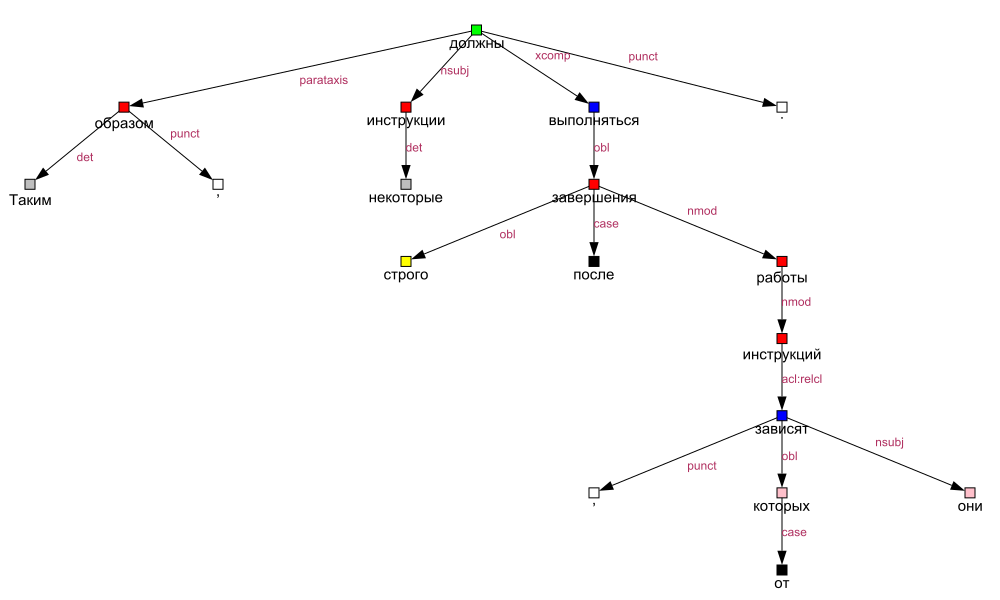

In [7]:
graph = igraph.Graph(n = 1, directed=True)

graph.vs[0]["label"] = root.token
graph.vs[0]["pos"] = root.token["upos"]


def processChildren(vert, index = 0):
    parent = index
    for kid in vert.children:
        graph.add_vertices(1)
        index = graph.vcount() - 1
        graph.add_edges([(parent, index)])
        graph.vs[index]["label"] = kid.token
        graph.vs[index]["pos"] = kid.token["upos"]
        graph.es[index - 1]["label"] = kid.token["deprel"]
        graph.es[index - 1]["curved"] = 0
        processChildren(kid, index = index)
        
processChildren(root)    
print(graph.summary())


color_dict = {"VERB": "blue", "NOUN": "red", "ADJ": "green", "ADV": "yellow", "PRON": "pink", "ADP": "black", "DET": "grey", "PUNCT": "white", "PART": "red", "PROPN": "red", "CCONJ": "red"}
visual_style = {}
visual_style["vertex_size"] = 10
visual_style["vertex_shape"] = "rect"
visual_style["vertex_label_dist"] = 2
visual_style["vertex_label_size"] = 15
visual_style["vertex_color"] = [color_dict[gender] for gender in graph.vs["pos"]]
visual_style["edge_color"] = "black"
visual_style["edge_width"] = 1
visual_style["edge_curved"] = 0
visual_style["edge_arrow_width"] = 1
visual_style["edge_arrow_size"] = 1
visual_style["edge_label_dist"] = 0
visual_style["edge_label_color"] = "maroon"
visual_style["edge_label_size"] = 12
visual_style["layout"] = graph.layout("tree")
visual_style["bbox"] = (1000, 600)
visual_style["margin"] = 30
igraph.plot(graph, **visual_style)

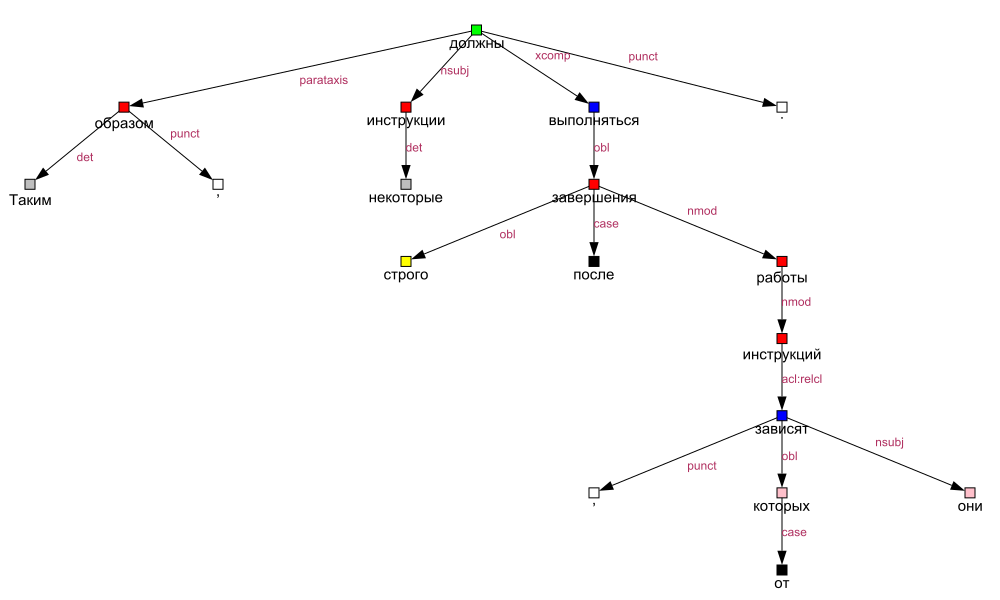

In [8]:
igraph.plot(graph, "social_network.pdf", **visual_style)